**INTRODUCTION**

Hello! The purpose is to train Prostate Cancer datas with some machine learning and deep learning methods. I'm believe in this course will learn a lot of thing to us. You'll see this kernel:

* EDA (Exploratory Data Analysis)
* Data Preprocessing (Scaling, Reshaping)
* Test-Train Datas Split
* Logistic Regression Classification
* KNN Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Desicion Tree Classification
* Random Forest Classification
* Artificial Neural Network
* Recurrent Neural Network
* Compare all of these Classification Models
* Conclusion

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix # We'll use a lot of times it!

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Prostate_Cancer.csv']


In [2]:
Cancer = pd.read_csv('../input/Prostate_Cancer.csv')

In [3]:
Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
id                   100 non-null int64
diagnosis_result     100 non-null object
radius               100 non-null int64
texture              100 non-null int64
perimeter            100 non-null int64
area                 100 non-null int64
smoothness           100 non-null float64
compactness          100 non-null float64
symmetry             100 non-null float64
fractal_dimension    100 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [4]:
Cancer.head(10)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [5]:
Cancer.tail()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066
99,100,M,16,27,94,643,0.098,0.114,0.188,0.064


In [6]:
Cancer.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [7]:
Cancer.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [8]:
# We don't care id of the columns. So, we drop that!
Cancer.drop(['id'],axis=1,inplace=True)

In [9]:
Cancer.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [10]:
# diagnosis_result is the most important column for us. Because we'll classify datas depend on this column.
# We have to integers for classification. Therefore, we must convert them from object to integer.
Cancer.diagnosis_result = [1 if each == 'M' else 0 for each in Cancer.diagnosis_result]

In [11]:
# Let's check it.
Cancer.diagnosis_result.value_counts()
# And then, we assigned 1 and 0 to M and B. Let's some classification!

1    62
0    38
Name: diagnosis_result, dtype: int64

In [12]:
# We should assign x and y values for test-train datas split.
y = Cancer.diagnosis_result.values
x_data = Cancer.drop(['diagnosis_result'],axis=1)

In [13]:
# See our values
y

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [14]:
x_data.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059


In [15]:
# Normalization: Normalization means all of the values of data, scale between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x_data)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [16]:
x

array([[0.875     , 0.0625    , 0.825     , 0.44868735, 1.        ,
        0.78175896, 0.63313609, 0.59090909],
       [0.        , 0.125     , 0.675     , 0.67064439, 1.        ,
        0.13355049, 0.27218935, 0.09090909],
       [0.75      , 1.        , 0.65      , 0.59725537, 0.75342466,
        0.39739414, 0.4260355 , 0.15909091],
       [0.3125    , 0.3125    , 0.21666667, 0.1097852 , 0.        ,
        0.80130293, 0.73964497, 1.        ],
       [0.        , 0.5       , 0.69166667, 0.65334129, 0.97260274,
        0.30944625, 0.27218935, 0.13636364],
       [1.        , 0.875     , 0.25833333, 0.16408115, 0.79452055,
        0.42996743, 0.43786982, 0.52272727],
       [0.4375    , 0.9375    , 0.56666667, 0.5       , 0.34246575,
        0.23127036, 0.26035503, 0.09090909],
       [0.375     , 0.4375    , 0.31666667, 0.22434368, 0.67123288,
        0.41368078, 0.50295858, 0.5       ],
       [0.625     , 0.8125    , 0.3       , 0.18973747, 0.78082192,
        0.50488599, 0.591715

In [17]:
# We are ready to split datas as train and test.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
#%40 data will assign as 'Test Datas'
method_names=[] # In Conclusion part, I'll try to show you which method gave the best result.
method_scores=[]

In [18]:
# Let's look at new values.
x_train

array([[0.5625    , 0.125     , 0.175     , 0.12350835, 0.34246575,
        0.05537459, 0.33727811, 0.13636364],
       [0.125     , 0.        , 0.23333333, 0.1575179 , 0.24657534,
        0.18241042, 0.34319527, 0.25      ],
       [0.0625    , 0.8125    , 0.375     , 0.26431981, 0.47945205,
        0.48534202, 0.53254438, 0.36363636],
       [0.125     , 0.        , 0.63333333, 0.53818616, 0.28767123,
        0.58957655, 0.56804734, 0.22727273],
       [0.5       , 0.625     , 0.24166667, 0.17959427, 0.38356164,
        0.04560261, 0.14201183, 0.09090909],
       [0.8125    , 0.5       , 0.375     , 0.27267303, 0.60273973,
        0.39739414, 0.56213018, 0.40909091],
       [0.9375    , 0.3125    , 0.28333333, 0.21539379, 0.16438356,
        0.07166124, 0.25443787, 0.06818182],
       [0.8125    , 0.1875    , 0.21666667, 0.14856802, 0.47945205,
        0.10749186, 0.32544379, 0.29545455],
       [1.        , 0.        , 0.26666667, 0.16348449, 0.67123288,
        0.65798046, 0.402366

**And now time to classification!**


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Classification Test Accuracy 0.75


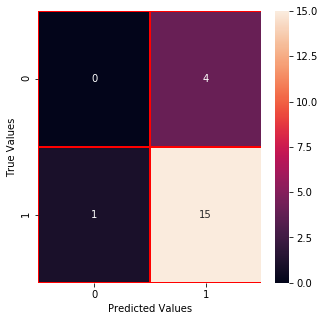

In [19]:
# Firstly, we start with Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))

#Confusion Matrix
y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Score for Number of Neighbors = 5: 0.8


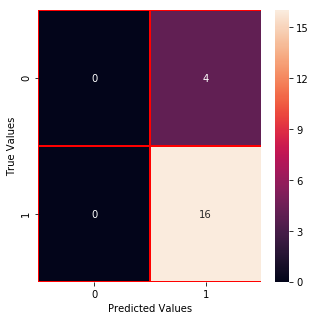

In [20]:
# Continue with; KNN Classification!
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # 5 is optional.
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 5: {}".format(knn.score(x_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Classification Score is: 0.75


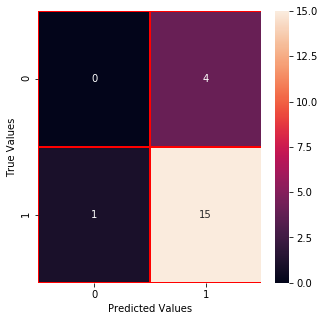

In [21]:
# SVM!
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(x_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))
method_names.append("SVM")
method_scores.append(svm.score(x_test,y_test))

#Confusion Matrix
y_pred = svm.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Naive Bayes Classification Score: 0.8


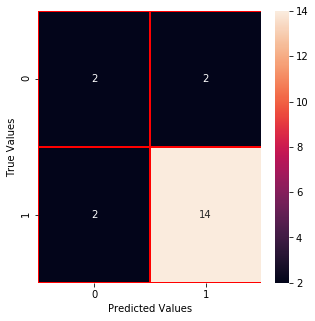

In [22]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_test,y_test)
print("Naive Bayes Classification Score: {}".format(naive_bayes.score(x_test,y_test)))
method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(x_test,y_test))

#Confusion Matrix
y_pred = naive_bayes.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Decision Tree Classification Score:  0.65


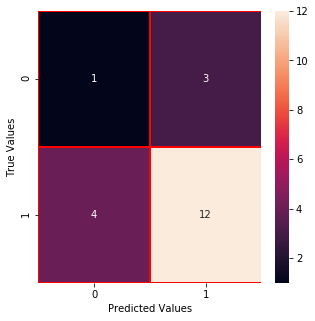

In [23]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(x_test,y_test))
method_names.append("Decision Tree")
method_scores.append(dec_tree.score(x_test,y_test))

#Confusion Matrix
y_pred = dec_tree.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Random Forest Classification Score:  0.75


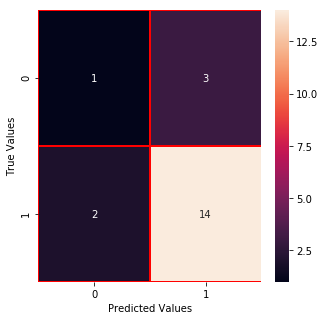

In [24]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(x_train,y_train)
print("Random Forest Classification Score: ",rand_forest.score(x_test,y_test))
method_names.append("Random Forest")
method_scores.append(rand_forest.score(x_test,y_test))

#Confusion Matrix
y_pred = rand_forest.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [25]:
# ANN!
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Using TensorFlow backend.


Epoch 1/200
53/53 [==============================] - 0s 7ms/step - loss: 0.6932 - acc: 0.4528
Epoch 2/200
53/53 [==============================] - 0s 89us/step - loss: 0.6931 - acc: 0.6415
Epoch 3/200
53/53 [==============================] - 0s 91us/step - loss: 0.6930 - acc: 0.5472
Epoch 4/200
53/53 [==============================] - 0s 89us/step - loss: 0.6928 - acc: 0.5472
Epoch 5/200
53/53 [==============================] - 0s 86us/step - loss: 0.6927 - acc: 0.5472
Epoch 6/200
53/53 [==============================] - 0s 84us/step - loss: 0.6926 - acc: 0.5472
Epoch 7/200
53/53 [==============================] - 0s 89us/step - loss: 0.6924 - acc: 0.5472
Epoch 8/200
53/53 [==============================] - 0s 90us/step - loss: 0.6922 - acc: 0.5472
Epoch 9/200
53/53 [==============================] - 0s 89us/step - loss: 0.6921 - acc: 0.5472
Epoch 10/200
53/53 [==============================] - 0s 85us/step - loss: 0.6919 - acc: 0.5472
Epoch 11/200
53/53 [==============================

In [26]:
method_names.append("ANN")
method_scores.append(0.851)

In [27]:
trainX = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
testX = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
# Print and check shapes
print("Shape of trainX is {}".format(trainX.shape))
print("Shape of testX is {}".format(testX.shape))

Shape of trainX is (80, 8, 1)
Shape of testX is (20, 8, 1)


In [28]:
from keras.layers import Dense, SimpleRNN, Dropout
from keras.metrics import mean_squared_error
from keras.models import Sequential
model = Sequential()
# Add the first layer and Dropout regularization
model.add(SimpleRNN(units=100,activation='tanh',return_sequences=True, 
                    input_shape=(trainX.shape[1],1)))
model.add(Dropout(0.20))
# Second layer and Dropout regularization
model.add(SimpleRNN(units = 100, activation='tanh',return_sequences=True))
model.add(Dropout(0.20))
# Third layer and Dropout regularization
model.add(SimpleRNN(units = 70, activation='tanh', return_sequences= True))
model.add(Dropout(0.20))
# Fourth layer and Dropout regularization
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.20))
# Add final or output layer
model.add(Dense(units=1))

# Compile our RNN model
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ['accuracy'])
# Fitting the RNN to the training set
model.fit(trainX, y_train, epochs = 200, batch_size=32)
# Remember; epochs, batch_size etc. are just some of hyper parameters. 
# You can change these parameters whatever you want
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/200
80/80 [==============================] - 1s 16ms/step - loss: 1.1849 - acc: 0.3125
Epoch 2/200
80/80 [==============================] - 0s 645us/step - loss: 0.8122 - acc: 0.4375
Epoch 3/200
80/80 [==============================] - 0s 593us/step - loss: 0.8178 - acc: 0.3750
Epoch 4/200
80/80 [==============================] - 0s 641us/step - loss: 0.6517 - acc: 0.4250
Epoch 5/200
80/80 [==============================] - 0s 627us/step - loss: 0.6644 - acc: 0.3750
Epoch 6/200
80/80 [==============================] - 0s 652us/step - loss: 0.4016 - acc: 0.6375
Epoch 7/200
80/80 [==============================] - 0s 668us/step - loss: 0.4999 - acc: 0.5250
Epoch 8/200
80/80 [==============================] - 0s 619us/step - loss: 0.5096 - acc: 0.5125
Epoch 9/200
80/80 [==============================] - 0s 632us/step - loss: 0.4627 - acc: 0.5375
Epoch 10/200
80/80 [==============================] - 0s 630us/step - loss: 0.4538 - acc: 0.5750
Epoch 11/200
80/80 [====================

In [29]:
method_names.append("RNN")
method_scores.append(0.887)

**CONCLUSION**

We've already completed to train our data with a lot of different method. Let's look which method is given the best result to us!


Text(0,0.5,'Method Score')

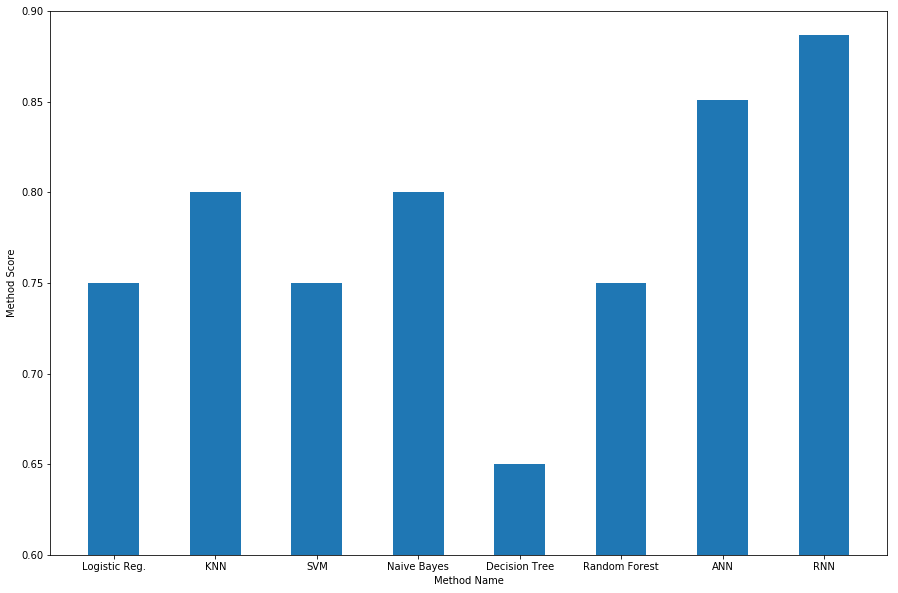

In [30]:
plt.figure(figsize=(15,10))
plt.ylim([0.60,0.90])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')

As we can see easily; RNN gave us the best result! I hope you learned something like I did. Please comment me!